In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [4]:
path = '/content/drive/MyDrive/number.png'

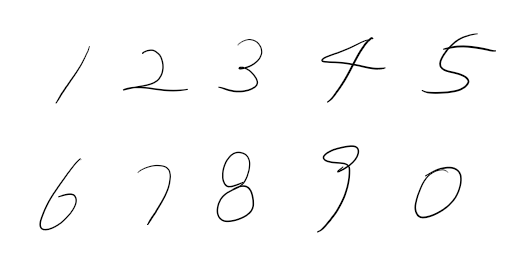

In [7]:
src_image = cv2.imread(path,cv2.IMREAD_COLOR)
cv2_imshow(src_image)

In [12]:
cpy_image = src_image.copy()
gray_image = cv2.cvtColor(cpy_image,cv2.COLOR_BGR2GRAY)
cpy_image.shape, gray_image.shape

((259, 532, 3), (259, 532))

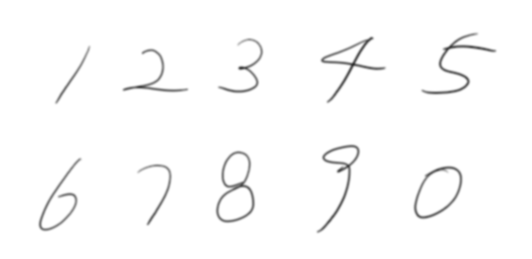

In [13]:
blur_image = cv2.GaussianBlur(gray_image,(5,5),0)
cv2_imshow(blur_image)

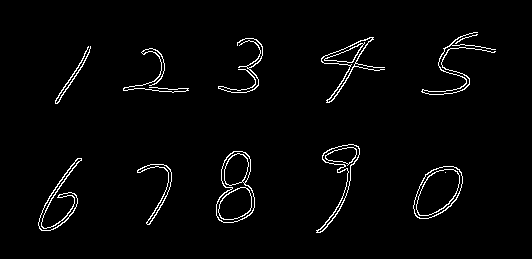

In [14]:
canny_image = cv2.Canny(blur_image,100,200)
cv2_imshow(canny_image)

In [16]:
contours,_ = cv2.findContours(canny_image,
                 cv2.RETR_TREE,
                 cv2.CHAIN_APPROX_SIMPLE)
len(contours)

27

In [18]:
for contour in contours:
  x,y,w,h = cv2.boundingRect(contour)
  if (w>=30) and (h>=40):
    print(".",end=' ')

. . . . . . . . . . . . . . . . . . 

In [19]:
store_xywh=[]
for contour in contours:
  x,y,w,h = cv2.boundingRect(contour)
  flag = False #비슷한 데이터가 없다.
  if (w>=30) and (h>=40):
    for sv in store_xywh:
      gx = abs(sv[0]-x)
      gy = abs(sv[1]-y)
      if (gx<5) and (gy<5):
        flag = True #이미 비슷한 것 찾은 게 있네
        break
    if flag == False: #비슷한 것을 발견하지 못함
      store_xywh.append([x,y,w,h])

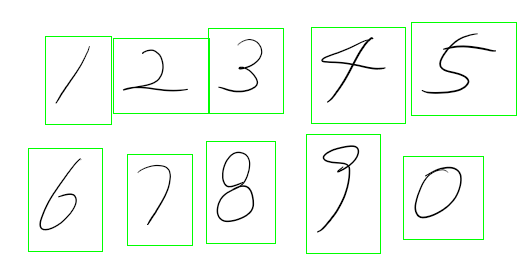

In [20]:
for sv in store_xywh:
  x,y,w,h = sv
  cv2.rectangle(src_image,
     (x-10,y-10),
     (x+w+20,y+h+20),
     (0,255,0),1)
cv2_imshow(src_image)